In [1]:
#resources
#yelp Api Tutorial: https://www.youtube.com/watch?v=GJf7ccRIK4U
#yelp white pages: https://www.yelp.com/developers/documentation/v3/business_search
#google complex class work that had interrow: 
#https://github.com/the-Coding-Boot-Camp-at-UT/UTAMCB201904DATA3/blob/master/06-Python-APIs/3/Activities/05-Stu_Google_Complex/Solved/Airport_Ratings.ipynb

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import json

# Import API key
from config import yelp_api_key
from config import open_weather_api_key


In [3]:
#print(yelp_api_key)
#print(open_weather_api_key)

In [4]:
#Create a DF for City Demographic Data
# Save file path to variable
csv_path = "City_demographics - Sheet1.csv"
# Read with Pandas
Cities_data_df = pd.read_csv(csv_path)
Cities_data_df.head()


,City,Census 2010 Total Population,"2018 Population Estimate (as of July 1, 2018)",2017 ACS 5-Year Population Estimate,Median Age,Number of Companies,Educational Attainment: Percent high school graduate or higher,Total housing units,Median Household Income,Foreign Born Population,...,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino",Veterans
0,New York,"8,175,133","8,398,748","8,560,072",36.2,"1,050,911",81.10%,"3,455,117","57,782","3,180,098",...,"3,661,800","2,081,507","34,487","1,198,334","4,358","1,294,497","285,089","2,491,496","2,747,159","163,465"
1,Los Angeles,"9,818,605","10,105,518","10,105,722",36.0,"1,146,701",78.20%,"3,506,903","61,015","3,478,879",...,"5,232,835","828,981","68,211","1,460,508","27,691","2,101,084","386,412","4,893,579","2,676,982","280,109"
2,Chicago,"2,695,598","2,705,994","2,722,586",34.1,"291,007",83.80%,"1,200,305","52,497","563,879",...,"1,337,911","830,626","7,723","169,458",841,"304,527","71,500","789,713","890,322","75,405"
3,Houston,"4,092,459","4,698,619","4,525,519",33.1,"438,793",80.50%,"1,714,340","57,791","1,174,879",...,"2,864,288","857,122","19,465","309,400","3,091","368,849","103,304","1,910,535","1,386,576","163,317"
4,Phoenix,"1,445,632","1,660,272","1,574,421",33.3,"124,033",81.20%,"608,384","52,080","308,744",...,"1,131,958","108,846","31,543","57,211","3,192","184,145","57,526","668,376","682,354","72,364"


In [5]:
#clean_cities_df["2018 Population Estimate"]
#test removing commas to make into ints

clean_cities_df = Cities_data_df.replace({',':''}, regex=True)
clean_cities_df.tail()

,City,Census 2010 Total Population,"2018 Population Estimate (as of July 1, 2018)",2017 ACS 5-Year Population Estimate,Median Age,Number of Companies,Educational Attainment: Percent high school graduate or higher,Total housing units,Median Household Income,Foreign Born Population,...,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino",Veterans
15,Charlotte,731424,872498,826060,33.9,81973,88.60%,343222,58202,135701,...,413212,289406,2523,51437,483,45268,23731,115379,348789,35382
16,Indianapolis,820445,867125,853431,34.1,69366,85.50%,383677,44709,79098,...,527521,239617,2299,25496,372,32343,25783,86362,477245,45024
17,Seattle,608660,744955,688245,36.0,83323,94.20%,334739,79565,123919,...,472347,48884,3799,99728,2675,15155,45657,44505,449138,29816
18,Denver,600158,716492,678467,34.4,79097,86.70%,306714,60098,107141,...,521481,64466,6537,24433,993,37216,23341,207100,363712,29712
19,Washington DC,601723,702455,672391,33.9,63408,90.30%,308161,77649,94421,...,273471,321062,1757,25558,289,30961,19293,71829,241901,27695


In [6]:
#list(Cities_data_df) 

In [7]:
#Paring down the number of headers to only what we are interested in
clean_cities_df = clean_cities_df[['City', 
                                  '2018 Population Estimate (as of July 1, 2018)', 
                                  'Median Household Income', 
                                  'Foreign Born Population',
                                  'Black or African American alone',
                                  'American Indian and Alaska Native alone',
                                  'Asian alone',
                                  'Native Hawaiian and Other Pacific Islander alone',
                                  'Two or More Races',
                                  'Hispanic or Latino (of any race)',
                                  'White alone, Not Hispanic or Latino',]]
clean_cities_df.tail()

,City,"2018 Population Estimate (as of July 1, 2018)",Median Household Income,Foreign Born Population,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino"
15,Charlotte,872498,58202,135701,289406,2523,51437,483,23731,115379,348789
16,Indianapolis,867125,44709,79098,239617,2299,25496,372,25783,86362,477245
17,Seattle,744955,79565,123919,48884,3799,99728,2675,45657,44505,449138
18,Denver,716492,60098,107141,64466,6537,24433,993,23341,207100,363712
19,Washington DC,702455,77649,94421,321062,1757,25558,289,19293,71829,241901


In [8]:
#Rename Headers to make it easier later

clean_cities_df.columns=["City",
                        '2018 Population Estimate',
                        "Median Household Income",
                        "Foreign Born Population",
                        'African American',
                        'Native American',
                        'Asian',
                        'Pacific Islander',
                        'Two or More Races',
                        'Hispanic or Latino',
                        "White"]
clean_cities_df.head()

,City,2018 Population Estimate,Median Household Income,Foreign Born Population,African American,Native American,Asian,Pacific Islander,Two or More Races,Hispanic or Latino,White
0,New York,8398748,57782,3180098,2081507,34487,1198334,4358,285089,2491496,2747159
1,Los Angeles,10105518,61015,3478879,828981,68211,1460508,27691,386412,4893579,2676982
2,Chicago,2705994,52497,563879,830626,7723,169458,841,71500,789713,890322
3,Houston,4698619,57791,1174879,857122,19465,309400,3091,103304,1910535,1386576
4,Phoenix,1660272,52080,308744,108846,31543,57211,3192,57526,668376,682354


In [9]:
clean_cities_df= clean_cities_df.astype({"City" : str,
                                        '2018 Population Estimate' : int, 
                                        "Median Household Income" : int,
                                        "Foreign Born Population" : int,
                                        'African American' : int,
                                        'Native American' : int,
                                        'Asian' : int,
                                        'Pacific Islander' : int,
                                        'Two or More Races' : int,
                                        'Hispanic or Latino' : int,
                                        "White" : int})

clean_cities_df.head()

,City,2018 Population Estimate,Median Household Income,Foreign Born Population,African American,Native American,Asian,Pacific Islander,Two or More Races,Hispanic or Latino,White
0,New York,8398748,57782,3180098,2081507,34487,1198334,4358,285089,2491496,2747159
1,Los Angeles,10105518,61015,3478879,828981,68211,1460508,27691,386412,4893579,2676982
2,Chicago,2705994,52497,563879,830626,7723,169458,841,71500,789713,890322
3,Houston,4698619,57791,1174879,857122,19465,309400,3091,103304,1910535,1386576
4,Phoenix,1660272,52080,308744,108846,31543,57211,3192,57526,668376,682354


In [10]:
#import CSV that contains the cities, as well as the cuisines
# Save file path to variable
csv_path = "Spicy foods per city.csv"
# Read with Pandas
foods_per_data_df = pd.read_csv(csv_path)
foods_per_data_df.tail()

,City,thai,indpak,chinese,colombian,srilankan,caribbean,korean,mexican,laotian,indonesian,ethiopian,malaysian,cajun,senegalese
15,Charlotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Indianapolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Seattle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Denver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Washington DC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#creating list based on the csv. any changes in the csv will be automatically updated here(ie new cuisine types added)
cuisine_type=[]
cuisine_type =foods_per_data_df.columns[1:].values.tolist()
print(cuisine_type)

['thai', 'indpak', 'chinese', 'colombian ', 'srilankan', 'caribbean', 'korean', 'mexican', 'laotian', 'indonesian', 'ethiopian', 'malaysian', 'cajun', 'senegalese']


In [12]:
#Convert Cuisine type to sting to use in api call
cuisine_list=str(cuisine_type)

#remove all unnecesary characters to pass yelp
cuisine_list=cuisine_list.replace("'","")
cuisine_list=cuisine_list.replace("[","")
cuisine_list=cuisine_list.replace("]","")
cuisine_list=cuisine_list.replace(" ","")
#print(cuisine_list)


In [13]:
#base url
url = (f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={open_weather_api_key}')
# Set Country Code
country_code = 'US'

In [14]:
# Create lists to append the API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Log file print statement
print("Retrieving Weather Data")
print("-------------------------------")

#Create for loop to loop through all cities
for index, row in foods_per_data_df.iterrows(): 
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={row[0]},{country_code}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {city_record}")
       
        
       
        
        # Setting timer to not over exceed rate limit of API
        #https://openweathermap.org/guide
        #Free tariff The number of calls you are allowed to make depends on the subscription plan you choose. 
        #Free users can make 60 requests per minute. Using the service under Free tier, 
        #you can work with the following weather APIs:
        time.sleep(1.5)
        
    # If no record found "skip" to next call
    except:
        print("----City not found, Moving on----")
    continue

Retrieving Weather Data
-------------------------------
Processing Record New York
----City not found, Moving on----
Processing Record Los Angeles
----City not found, Moving on----
Processing Record Chicago
----City not found, Moving on----
Processing Record Houston
----City not found, Moving on----
Processing Record Phoenix
----City not found, Moving on----
Processing Record Philadelphia
----City not found, Moving on----
Processing Record San Antonio
----City not found, Moving on----
Processing Record San Diego
----City not found, Moving on----
Processing Record Dallas
----City not found, Moving on----
Processing Record San Jose
----City not found, Moving on----
Processing Record Austin
----City not found, Moving on----
Processing Record Jacksonville
----City not found, Moving on----
Processing Record Fort Worth
----City not found, Moving on----
Processing Record Columbus
----City not found, Moving on----
Processing Record San Francisco
----City not found, Moving on----
Processing Rec

In [15]:
#print(response)

In [16]:
#Create dict for dataframe
Weather_dict = {"City" : city_name,
                "Latitude" : lat,
                "Longitude" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed,   
                "Cloudiness" : cloudiness,
                "County": country,
                "Date" : date,
                "Humidity" : humidity}

In [17]:
#Create DF "Weather_data_df"
Weather_data_df = pd.DataFrame(Weather_dict)
#updating the formatting to be consistent between weather and yelp data
#Weather adds a . after DC

Weather_data_df['City'] = Weather_data_df['City'].str.replace('.', '')
Weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,County,Date,Humidity
0,New York,40.73,-73.99,88.00,7.27,75,US,1562423889,70
1,Los Angeles,34.05,-118.24,66.99,4.85,90,US,1562423806,82
2,Chicago,41.88,-87.62,84.99,6.93,75,US,1562423820,74
3,Houston,29.76,-95.37,87.01,6.93,20,US,1562424016,70
4,Phoenix,33.45,-112.08,90.00,2.17,20,US,1562423872,19


In [18]:
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer %s' % yelp_api_key}

In [19]:
#Spicy restaurant totals

spicy_totals_city = []
spicy_total = []

#####record = 1

# Log file print statement
print("Retrieving Spicy Data")
print("-------------------------------")

#Create for loop to loop through all cities

for index, row in foods_per_data_df.iterrows():
    for cuisine in foods_per_data_df.columns[1:]:

    # change location each iteration while leaving original params in place
    #changing to Austin to test changeback to row[0]
            params = {"location" : row[0],
                    'categories': cuisine_list,
                      "limit":1
                     }

    #base URL
    base_url = 'https://api.yelp.com/v3/businesses/search'

    # make request and print url
    response = requests.get(url, params=params, headers=headers)


    # convert to json
    business_data = response.json()
    for x in range(len(business_data['businesses'])):       
    # Try statement to append calls where value is found 


        spicy_totals_city.append(business_data["businesses"][x]["location"]["city"])
        spicy_total.append(business_data['total'])
        

Retrieving Spicy Data
-------------------------------


In [20]:
spicy_restaurant_per_city_df= pd.DataFrame({"City": spicy_totals_city, 
                               "Spicy Restaurants": spicy_total})

In [21]:
#updating the formatting to be consistent between weather and yelp data
#Yelp Adds a , after washington
spicy_restaurant_per_city_df['City'] = spicy_restaurant_per_city_df['City'].str.replace(',', '')
spicy_restaurant_per_city_df.head()

,City,Spicy Restaurants
0,New York,4700
1,Los Angeles,2700
2,Chicago,1600
3,Houston,740
4,Phoenix,568


In [22]:
#just restaurant totals
# Start the call counter 
grand_totals_city = []
grand_total = []

#####record = 1

# Log file print statement
print("Retrieving Total Restaurant Data")
print("-------------------------------")

#Create for loop to loop through all cities

for index, row in foods_per_data_df.iterrows():
    #for cuisine in foods_per_data_df.columns[1:]:

    # change location each iteration while leaving original params in place
    #changing to Austin to test changeback to row[0]
            params = {"location" : row[0],
                    'categories': "restaurant",
                      "limit":1
                     }

    #base URL
            base_url = 'https://api.yelp.com/v3/businesses/search'

    # make request and print url
            response = requests.get(url, params=params, headers=headers)


            # convert to json
            business_data = response.json()
            for x in range(len(business_data['businesses'])):       
            # Try statement to append calls where value is found 


                grand_totals_city.append(business_data["businesses"][x]["location"]["city"])
                grand_total.append(business_data['total'])


Retrieving Total Restaurant Data
-------------------------------


In [23]:
all_restaurants_per_city_df= pd.DataFrame({"City": grand_totals_city, 
                               "Total Restaurants": grand_total})

In [24]:
#updating the formatting to be consistent between weather and yelp data
#Yelp Adds a , after washington
all_restaurants_per_city_df['City'] = all_restaurants_per_city_df['City'].str.replace(',', '')
all_restaurants_per_city_df.head()

,City,Total Restaurants
0,New York,25000
1,Los Angeles,11300
2,Chicago,8500
3,Houston,3700
4,Phoenix,2600


In [25]:
#merge total restaurants with spicy on city
#All Yelp Data in one table
all_restaurants_df = pd.merge(all_restaurants_per_city_df, spicy_restaurant_per_city_df, on="City")

In [26]:
all_restaurants_df.head()

,City,Total Restaurants,Spicy Restaurants
0,New York,25000,4700
1,Los Angeles,11300,2700
2,Chicago,8500,1600
3,Houston,3700,740
4,Phoenix,2600,568


In [27]:
#total/spicy
percent_spicy = all_restaurants_df['Spicy Restaurants'] / all_restaurants_df['Total Restaurants']
percent_spicy = round(percent_spicy * 100,2)
Spice_index = pd.DataFrame({"City": all_restaurants_df["City"],
                            "Total Restaurants": grand_total,
                            "Spicy Restaurants": spicy_total,
                            "Percent of Restaurants That are Spicy" : percent_spicy })

#percent_of_spiciness
#age_demographics_percents = round(age_demographics_totals / num_players * 100,2)
Spice_index.head()

,City,Total Restaurants,Spicy Restaurants,Percent of Restaurants That are Spicy
0,New York,25000,4700,18.80
1,Los Angeles,11300,2700,23.89
2,Chicago,8500,1600,18.82
3,Houston,3700,740,20.00
4,Phoenix,2600,568,21.85


In [28]:
weather_plus_restaurants_df=pd.merge(Spice_index, Weather_data_df, on="City")
weather_plus_restaurants_df.head()

,City,Total Restaurants,Spicy Restaurants,Percent of Restaurants That are Spicy,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,County,Date,Humidity
0,New York,25000,4700,18.80,40.73,-73.99,88.00,7.27,75,US,1562423889,70
1,Los Angeles,11300,2700,23.89,34.05,-118.24,66.99,4.85,90,US,1562423806,82
2,Chicago,8500,1600,18.82,41.88,-87.62,84.99,6.93,75,US,1562423820,74
3,Houston,3700,740,20.00,29.76,-95.37,87.01,6.93,20,US,1562424016,70
4,Phoenix,2600,568,21.85,33.45,-112.08,90.00,2.17,20,US,1562423872,19


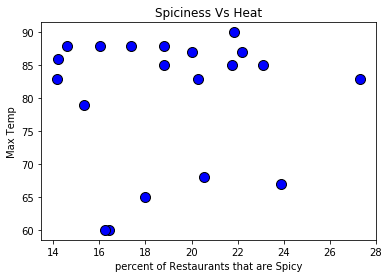

In [29]:
#Scatter Plot Max temp vs percent of spicy
#Shows the relation of spice to heat



plt.scatter(weather_plus_restaurants_df["Percent of Restaurants That are Spicy"], weather_plus_restaurants_df["Max Temp"],color = "blue", edgecolors="black",
                                            s = 100)
# Incorporate the other graph properties
plt.title("Spiciness Vs Heat")
plt.xlabel("percent of Restaurants that are Spicy")
plt.ylabel("Max Temp")


# Create a legend
#plt.legend(loc= "best") -seems unnecesary

plt.savefig('graphs/Spiciness Vs Heat')

#Show plot.
plt.show()



In [30]:
city_plus_restaurants_df=pd.merge(Spice_index, clean_cities_df, on="City")
city_plus_restaurants_df.head()

,City,Total Restaurants,Spicy Restaurants,Percent of Restaurants That are Spicy,2018 Population Estimate,Median Household Income,Foreign Born Population,African American,Native American,Asian,Pacific Islander,Two or More Races,Hispanic or Latino,White
0,New York,25000,4700,18.80,8398748,57782,3180098,2081507,34487,1198334,4358,285089,2491496,2747159
1,Los Angeles,11300,2700,23.89,10105518,61015,3478879,828981,68211,1460508,27691,386412,4893579,2676982
2,Chicago,8500,1600,18.82,2705994,52497,563879,830626,7723,169458,841,71500,789713,890322
3,Houston,3700,740,20.00,4698619,57791,1174879,857122,19465,309400,3091,103304,1910535,1386576
4,Phoenix,2600,568,21.85,1660272,52080,308744,108846,31543,57211,3192,57526,668376,682354


In [31]:
#total_population = Cities_data_df["2018 Population Estimate (as of July 1, 2018)"]
spicy_per_person = city_plus_restaurants_df["Spicy Restaurants"] / city_plus_restaurants_df["2018 Population Estimate"]
spicy_per_person = round(spicy_per_person *1000,2) 
spicy_per_person = pd.DataFrame({"City": city_plus_restaurants_df["City"],
                                "Population": city_plus_restaurants_df["2018 Population Estimate"],
                                "Spicy Restaurants": city_plus_restaurants_df["Spicy Restaurants"],
                                "Spicy Restaurants per Capita" : spicy_per_person })

spicy_per_person

,City,Population,Spicy Restaurants,Spicy Restaurants per Capita
0,New York,8398748,4700,0.56
1,Los Angeles,10105518,2700,0.27
2,Chicago,2705994,1600,0.59
3,Houston,4698619,740,0.16
4,Phoenix,1660272,568,0.34
5,Philadelphia,1584138,930,0.59
6,San Antonio,1532233,847,0.55
7,San Diego,1425976,918,0.64
8,Dallas,2637772,783,0.30
9,San Jose,1030119,954,0.93


In [32]:
#Scatter of heat + Diversity

In [33]:
clean_cities_df.tail()

,City,2018 Population Estimate,Median Household Income,Foreign Born Population,African American,Native American,Asian,Pacific Islander,Two or More Races,Hispanic or Latino,White
15,Charlotte,872498,58202,135701,289406,2523,51437,483,23731,115379,348789
16,Indianapolis,867125,44709,79098,239617,2299,25496,372,25783,86362,477245
17,Seattle,744955,79565,123919,48884,3799,99728,2675,45657,44505,449138
18,Denver,716492,60098,107141,64466,6537,24433,993,23341,207100,363712
19,Washington DC,702455,77649,94421,321062,1757,25558,289,19293,71829,241901


In [34]:
ethnic_population = clean_cities_df["Foreign Born Population"] + clean_cities_df["Native American"] + clean_cities_df["Asian"] + clean_cities_df["Pacific Islander"] + clean_cities_df["Two or More Races"] + clean_cities_df["Hispanic or Latino"]
diversity_score = clean_cities_df["2018 Population Estimate"]/ ethnic_population
diversity_score = round(diversity_score * 10,2)
diversity_score_df= pd.DataFrame({"City": city_plus_restaurants_df["City"],
                                "Population": clean_cities_df["2018 Population Estimate"],
                                "Ethnic Population": ethnic_population,
                                "Diversity Score" : diversity_score})
diversity_score_df.head()

,City,Population,Ethnic Population,Diversity Score
0,New York,8398748,7193862,11.67
1,Los Angeles,10105518,10315280,9.80
2,Chicago,2705994,1603114,16.88
3,Houston,4698619,3520674,13.35
4,Phoenix,1660272,1126592,14.74


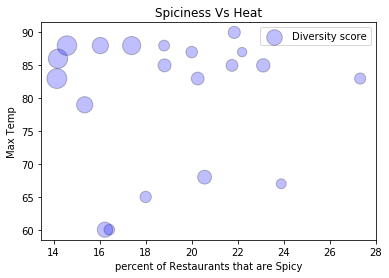

In [35]:
#Scatter Plot Max temp vs percent of spicy
#Shows the relation of spice to heat


plt.scatter(weather_plus_restaurants_df["Percent of Restaurants That are Spicy"], weather_plus_restaurants_df["Max Temp"],color = "blue", edgecolors="black", 
              s = diversity_score*10, label = "Diversity score", alpha = 0.25, linewidth = 1)
# Incorporate the other graph properties
plt.title("Spiciness Vs Heat")
plt.xlabel("percent of Restaurants that are Spicy")
plt.ylabel("Max Temp")


# Create a legend
plt.legend(loc= "best")


plt.savefig('graphs/Spiciness Vs Heat and diversity.png')  
#Show plot.
plt.show()




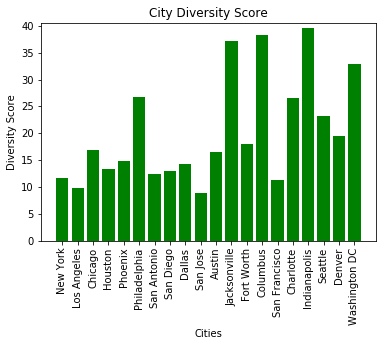

In [36]:
#Bar Graph - city diversity score


cities= diversity_score_df["City"]
diversity = diversity_score_df["Diversity Score"]

x_axis = cities
plt.bar(x_axis, diversity, color="r", align="center")



x_axis = cities
plt.bar(x_axis, diversity, color="g", align="center")


    # Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cities)
plt.xticks(rotation=90)

    # Set the limits of the x axis
#plt.xlim(-0.75, len(x_axis)-0.25)

    #Set the limits of the y axis
plt.ylim(0, max(diversity)+1)

    # Give the chart a title, x label, and y label
plt.title("City Diversity Score")
plt.xlabel("Cities")
plt.ylabel("Diversity Score")

plt.savefig('graphs/City Diversity Score.png')  

In [37]:




washington_dc_demographics=pd.DataFrame({"City" : clean_cities_df["City"],
                                          "Foreign Born Population" : clean_cities_df["Foreign Born Population"],
                                          "African American" : clean_cities_df["African American"],
                                          "Native American" : clean_cities_df["Native American"],
                                          "Asian" : clean_cities_df["Asian"],
                                          "Pacific Islander" : clean_cities_df["Pacific Islander"],
                                          "Two or More Races" : clean_cities_df["Two or More Races"],
                                          "Hispanic or Latino" : clean_cities_df["Hispanic or Latino"],
                                          "White" : clean_cities_df["White"]
                                        })
washington_dc_demographics=clean_cities_df.loc[clean_cities_df.City == 'Washington DC']
washington_dc_demographics

,City,2018 Population Estimate,Median Household Income,Foreign Born Population,African American,Native American,Asian,Pacific Islander,Two or More Races,Hispanic or Latino,White
19,Washington DC,702455,77649,94421,321062,1757,25558,289,19293,71829,241901


In [38]:
list(washington_dc_demographics)

['City',
 '2018 Population Estimate',
 'Median Household Income',
 'Foreign Born Population',
 'African American',
 'Native American',
 'Asian',
 'Pacific Islander',
 'Two or More Races',
 'Hispanic or Latino',
 'White']

In [39]:
Foreign_born = int(washington_dc_demographics['Foreign Born Population'])
African_American = int(washington_dc_demographics['African American'])
Native_American = int(washington_dc_demographics['Native American'])
Asian = int(washington_dc_demographics['Asian'])
Pacific_Islander = int(washington_dc_demographics['Pacific Islander'])
Two_or_more_races = int(washington_dc_demographics['Two or More Races'])
Hispanic_or_latino = int(washington_dc_demographics['Hispanic or Latino'])
White = int(washington_dc_demographics['White'])

Foreign_born
African_American

321062

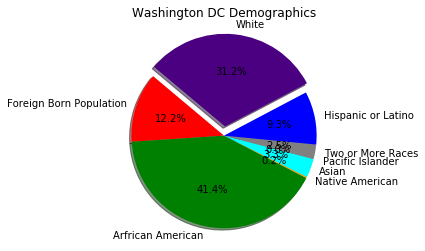

In [40]:
#Pie chart of Washington DCs demographics
labels = ['Foreign Born Population','Arfrican American','Native American','Asian','Pacific Islander','Two or More Races','Hispanic or Latino','White']
    
sizes = [Foreign_born, African_American, Native_American, Asian,Pacific_Islander, Two_or_more_races,
         Hispanic_or_latino, White]


colors  = ("red", "green", "orange", "cyan", "brown", "grey","blue","indigo", "beige", "yellow")

explode = (0, 0, 0, 0,0,0,0,0.1)

# Draw the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#title
plt.title('Washington DC Demographics')
plt.axis("equal")
               
               
plt.savefig('graphs/Washington DCs demographics.png')                  

In [41]:




houston_demographics=pd.DataFrame({"City" : clean_cities_df["City"],
                                          "Foreign Born Population" : clean_cities_df["Foreign Born Population"],
                                          "African American" : clean_cities_df["African American"],
                                          "Native American" : clean_cities_df["Native American"],
                                          "Asian" : clean_cities_df["Asian"],
                                          "Pacific Islander" : clean_cities_df["Pacific Islander"],
                                          "Two or More Races" : clean_cities_df["Two or More Races"],
                                          "Hispanic or Latino" : clean_cities_df["Hispanic or Latino"],
                                          "White" : clean_cities_df["White"]
                                        })
houston_demographics=clean_cities_df.loc[clean_cities_df.City == 'Houston']
houston_demographics

,City,2018 Population Estimate,Median Household Income,Foreign Born Population,African American,Native American,Asian,Pacific Islander,Two or More Races,Hispanic or Latino,White
3,Houston,4698619,57791,1174879,857122,19465,309400,3091,103304,1910535,1386576


In [42]:
#Pie chart of least Spicy Restaurants

H_Foreign_born = int(houston_demographics['Foreign Born Population'])
H_African_American = int(houston_demographics['African American'])
H_Native_American = int(houston_demographics['Native American'])
H_Asian = int(houston_demographics['Asian'])
H_Pacific_Islander = int(houston_demographics['Pacific Islander'])
H_Two_or_more_races = int(houston_demographics['Two or More Races'])
H_Hispanic_or_latino = int(houston_demographics['Hispanic or Latino'])
H_White = int(houston_demographics['White'])

H_Foreign_born
H_African_American

857122

In [43]:
Non_spicy_restaurants = all_restaurants_df['Total Restaurants'] - all_restaurants_df['Spicy Restaurants']
Spicy_vs_non_df= pd.DataFrame({'Total Restaurants' : all_restaurants_df['Total Restaurants'],
                               'Spicy Restaurants' : all_restaurants_df['Spicy Restaurants'],
                              'Non Spicy Restaurants' : Non_spicy_restaurants})

spicy_restaurants = (Spicy_vs_non_df['Spicy Restaurants']).sum()
non_spicy_restaurants = (Spicy_vs_non_df['Non Spicy Restaurants']).sum()
non_spicy_restaurants

90089

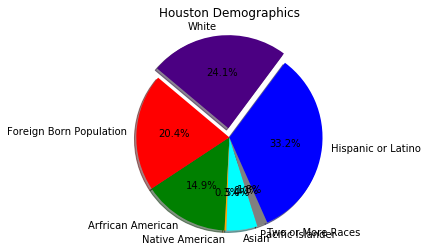

In [44]:
            #Pie chart of Washington DCs demographics
labels = ['Foreign Born Population','Arfrican American','Native American','Asian','Pacific Islander','Two or More Races','Hispanic or Latino','White']
    
sizes = [H_Foreign_born, H_African_American,  H_Native_American,  H_Asian,Pacific_Islander,  H_Two_or_more_races,
          H_Hispanic_or_latino,  H_White]


colors  = ("red", "green", "orange", "cyan", "brown", "grey","blue","indigo", "beige", "yellow")

explode = (0, 0, 0, 0,0,0,0,0.1)

# Draw the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#title
plt.title('Houston Demographics')
plt.axis("equal")
               
               
plt.savefig('graphs/Houstons demographics.png')      

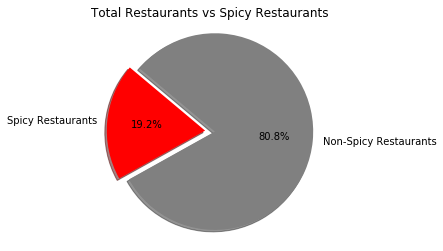

In [45]:
#pie chart Spicy vs non all cities

#Pie chart of national spicy vs non
labels = ['Spicy Restaurants','Non-Spicy Restaurants']
    
sizes = [spicy_restaurants, non_spicy_restaurants,]


colors  = ("red", "grey")

explode = (0.1,0)

# Draw the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#title
plt.title('Total Restaurants vs Spicy Restaurants')
plt.axis("equal")


plt.savefig('graphs/Total Restaurants vs Spicy Restaurants.png')

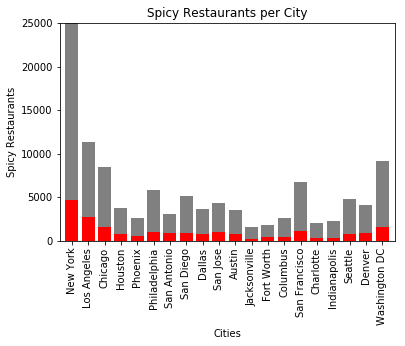

In [46]:
#Bar Graph - Spicy per capita



cities= city_plus_restaurants_df["City"]
all_spicy = all_restaurants_df['Spicy Restaurants']
all_restaurants = all_restaurants_df['Total Restaurants']

x_axis = cities


p2=plt.bar(x_axis, all_restaurants, color="gray", align="center")
p1=plt.bar(x_axis, all_spicy, color="r", align="center")
    # Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cities)
plt.xticks(rotation=90)

    # Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

    #Set the limits of the y axis
plt.ylim(0, max(all_restaurants)+0.4)

    # Give the chart a title, x label, and y label
plt.title("Spicy Restaurants per City")
plt.xlabel("Cities")
plt.ylabel("Spicy Restaurants")

plt.savefig("graphs/Spicy vs total")

In [47]:
foreign_born_pop = clean_cities_df["Foreign Born Population"] / clean_cities_df["2018 Population Estimate"]
foreign_born_pop = round(foreign_born_pop* 100,2)

foreign_born_effect= pd.DataFrame({"City" : city_plus_restaurants_df["City"],
                                   "Percent of Foreign Born":foreign_born_pop,
                                  "Number of Restaurants that are Spicy per capita": spicy_per_person["Spicy Restaurants per Capita"]})
foreign_born_effect.head()


,City,Percent of Foreign Born,Number of Restaurants that are Spicy per capita
0,New York,37.86,0.56
1,Los Angeles,34.43,0.27
2,Chicago,20.84,0.59
3,Houston,25.00,0.16
4,Phoenix,18.60,0.34


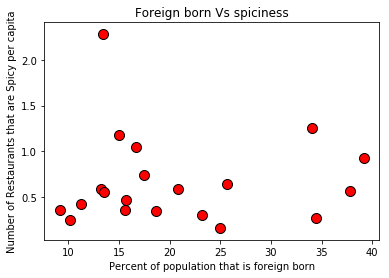

In [49]:
#Scatter Plot Foreign born vs percent of spicy
#Shows the relation of spice to heat


plt.scatter(foreign_born_effect["Percent of Foreign Born"], foreign_born_effect["Number of Restaurants that are Spicy per capita"],color = "red", edgecolors="black", 
              s = 100)
# Incorporate the other graph properties
plt.title("Foreign born Vs spiciness")
plt.xlabel("Percent of population that is foreign born")
plt.ylabel("Number of Restaurants that are Spicy per capita")


# Create a legend
#plt.legend(loc= "best")


plt.savefig('graphs/Foreign born Vs spiciness.png')  

#Show plot.
plt.show()

